# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

На этом уроке мы продолжим исследовать линейные модели,  
узначем, зачем для линейных моделей нужно масштабировать признаки,  
реализуем свою линейную регрессию с регуляризацией  
и усовршенствуем наш алгоритм градиентного спуска, сделав его стохастическим.  
Поехали!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [86]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape

(10,)

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [5]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [7]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

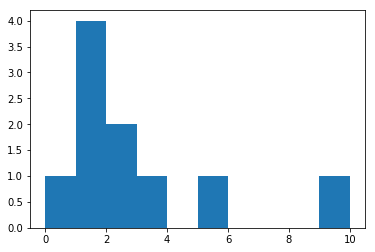

In [9]:
plt.hist(X[:,1]);

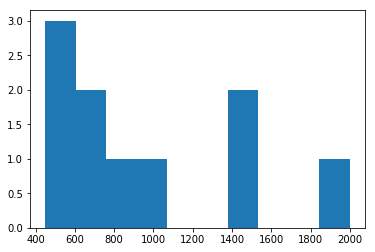

In [10]:
plt.hist(X[:,2]);

In [14]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [15]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [87]:
X_st = X.copy().astype(np.float64)

In [88]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

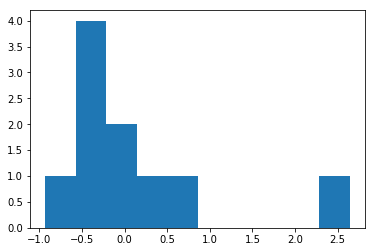

In [18]:
plt.hist(X_st[:,1]);

In [19]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [89]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [90]:
X_st[:,3] = custom_StandardScaler(X[:,3])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

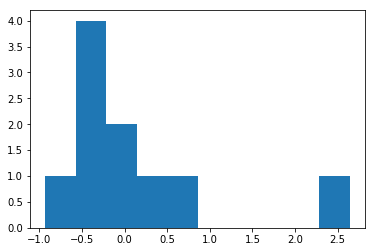

In [22]:
plt.hist(X_st[:,1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [23]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [24]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [94]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 100.48257660151313, веса: [49.81972642  3.89943763  3.24494497  4.44965476]
# итерация: 200, MSE: 41.39642231771707, веса: [56.39470748  4.36036123  2.97269285  4.31674589]
# итерация: 300, MSE: 40.1674995965527, веса: [57.26667855  4.71101129  2.72745036  4.21395704]
# итерация: 400, MSE: 40.02347954822831, веса: [57.38231897  4.98900825  2.52029571  4.14525404]
# итерация: 500, MSE: 39.941228683292735, веса: [57.39765515  5.21002101  2.34556492  4.10083377]
# итерация: 600, MSE: 39.88739614697844, веса: [57.39968903  5.38618975  2.19833892  4.07350275]
# итерация: 700, MSE: 39.851739039270186, веса: [57.39995876  5.52697716  2.07440436  4.05803883]
# итерация: 800, MSE: 39.82794119616154, веса: [57.39999453  5.63977637  1.97016335  4.05067292]
# итерация: 900, MSE: 39.811952241651085, веса: [57.39999927  5.73037762  1.88255148  4.04870365]
# итерация: 1000, MSE: 39.80114685393072, веса: [57.3999999   5.80332704  1.80896456  4.05021144]


array([57.3999999 ,  5.80332704,  1.80896456,  4.05021144])

In [26]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [27]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 39.60793909511726, веса: [57.39604987  5.51212826  2.07330492  4.09976597]
# итерация: 1000, MSE: 38.922529341289156, веса: [57.39804815  5.92176677  1.69065533  4.07534783]
# итерация: 1500, MSE: 38.56737815462284, веса: [57.39788743  6.06189725  1.53147533  4.09572604]
# итерация: 2000, MSE: 38.40288137631219, веса: [57.39782747  6.11241162  1.46593585  4.11135714]
# итерация: 2500, MSE: 38.33093680846516, веса: [57.39780443  6.13136484  1.43911245  4.11948945]
# итерация: 3000, MSE: 38.30045272865507, веса: [57.3977954   6.13867972  1.42817306  4.12322427]
# итерация: 3500, MSE: 38.28776586392248, веса: [57.39779181  6.14155637  1.42372097  4.12484543]
# итерация: 4000, MSE: 38.28254040260243, веса: [57.39779037  6.14270132  1.42191131  4.12552891]
# итерация: 4500, MSE: 38.280401228874304, веса: [57.39778979  6.14316047  1.42117629  4.12581247]
# итерация: 5000, MSE: 38.279528662925344, веса: [57.39778956  6.14334544  1.42087787  4.12592904]


array([57.39778956,  6.14334544,  1.42087787,  4.12592904])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [28]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [91]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406396, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280037, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617131, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702584, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405893, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321605, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050766, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

#### 1.

In [77]:
W_lst = []
lambda_lst = []
for i in range(101):
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=(1e-1)*(10**(-i)))
    lambda_lst.append((1e-1)*(10**(-i)))
    W_lst.append(W)

# итерация: 500, MSE: 47.59254063912751, веса: [54.66533282  4.86300292  2.65814614  3.92390998]
# итерация: 1000, MSE: 47.44844120135572, веса: [54.66666663  5.2195531   2.35823112  3.87056803]
# итерация: 1500, MSE: 47.423589522136574, веса: [54.66666667  5.29183992  2.28202799  3.87539954]
# итерация: 2000, MSE: 47.41806372054353, веса: [54.66666667  5.30735063  2.26292306  3.87923439]
# итерация: 2500, MSE: 47.41676045769479, веса: [54.66666667  5.31083176  2.25816992  3.88056789]
# итерация: 3000, MSE: 47.416446516103036, веса: [54.66666667  5.3116389   2.25699268  3.88095346]
# итерация: 3500, MSE: 47.41637017163542, веса: [54.66666667  5.31183021  2.25670188  3.8810568 ]
# итерация: 4000, MSE: 47.41635151437418, веса: [54.66666667  5.31187621  2.25663016  3.88108348]
# итерация: 4500, MSE: 47.41634694215803, веса: [54.66666667  5.31188737  2.25661249  3.88109022]
# итерация: 5000, MSE: 47.41634581984786, веса: [54.66666667  5.3118901   2.25660813  3.88109191]
# итерация: 500, MS

# итерация: 3000, MSE: 39.7777660554413, веса: [57.39999997  6.11472088  1.44041503  4.11195715]
# итерация: 3500, MSE: 39.777749334818665, веса: [57.39999997  6.11933807  1.43332643  4.11452273]
# итерация: 4000, MSE: 39.77774657960266, веса: [57.39999997  6.12117706  1.43044179  4.11560687]
# итерация: 4500, MSE: 39.77774612529105, веса: [57.39999997  6.12191513  1.42926884  4.11605745]
# итерация: 5000, MSE: 39.77774605036013, веса: [57.39999997  6.12221274  1.42879211  4.11624295]
# итерация: 500, MSE: 39.9815484835092, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257860053, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.78234065778456, веса: [57.4         5.99153675  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.77848905961639, веса: [57.4         6.07258433  1.50040895  4.09331596]
# итерация: 2500, MSE: 39.777867718769684, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE

# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035883, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000,

# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000,

# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500,

# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000,

# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000,

# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000,

# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000,

# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000,

# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500,

# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500,

In [71]:
W_1 = []
W_2 = []
W_3 = []
W_4 = []
for w in W_lst:
    W_1.append(w[0])
    W_2.append(w[1])
    W_3.append(w[2])
    W_4.append(w[3])

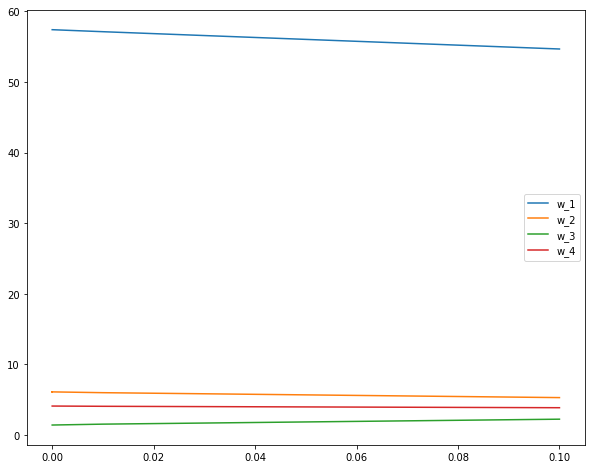

In [95]:
plt.figure(figsize=(10, 8))
plt.plot(lambda_lst, W_1, label='w_1')
plt.plot(lambda_lst, W_2, label='w_2')
plt.plot(lambda_lst, W_3, label='w_3')
plt.plot(lambda_lst, W_4, label='w_4')
plt.legend();

#### 2. Можно

#### 3.

In [83]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_*W/abs(W)) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [84]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2)

# итерация: 500, MSE: 39.9815484834799, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257854249, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.78234065774944, веса: [57.39999999  5.99153675  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059599494, веса: [57.39999999  6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771876229, веса: [57.39999999  6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.777766055395986, веса: [57.39999999  6.11472089  1.44041502  4.11195715]
# итерация: 3500, MSE: 39.77774933480006, веса: [57.39999999  6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.77774657959507, веса: [57.39999999  6.12117707  1.43044178  4.11560687]
# итерация: 4500, MSE: 39.777746125287976, веса: [57.39999999  6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.777746050358864, веса: [57.39999999  6.12221275  1.4287921   4.11624295]


array([57.39999999,  6.12221275,  1.4287921 ,  4.11624295])